In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
def calcR2(H,T,slope,igflag=0):
    """
    %
    % [R2,S,setup, Sinc, SIG, ir] = calcR2(H,T,slope,igflag);
    %
    % Calculated 2% runup (R2), swash (S), setup (setup), incident swash (Sinc)
    % and infragravity swash (SIG) elevations based on parameterizations from runup paper
    % also Iribarren (ir)
    % August 2010 - Included 15% runup (R16) statistic that, for a Guassian distribution, 
    % represents mean+sigma. It is calculated as R16 = setup + swash/4.  
    % In a wave tank, Palmsten et al (2010) found this statistic represented initiation of dune erosion. 
    %
    %
    % H = significant wave height, reverse shoaled to deep water
    % T = deep-water peak wave period
    % slope = radians
    % igflag = 0 (default)use full equation for all data
    %        = 1  use dissipative-specific calculations when dissipative conditions exist (Iribarren < 0.3)
    %        = 2  use dissipative-specific (IG energy) calculation for all data
    %
    % based on:
    %  Stockdon, H. F., R. A. Holman, P. A. Howd, and J. Sallenger A. H. (2006),
    %    Empirical parameterization of setup, swash, and runup,
    %    Coastal Engineering, 53, 573-588.
    % author: hstockdon@usgs.gov
    # Converted to Python by csherwood@usgs.gov
    """
    g = 9.81

    # make slopes positive!
    slope = np.abs(slope)

    # compute wavelength and Iribarren
    L = (g*T**2) / (2.*np.pi)
    sqHL = np.sqrt(H*L)
    ir = slope/np.sqrt(H/L)

    if igflag == 2:                     # use dissipative equations (IG) for ALL data
        R2 = 1.1*(0.039 * sqHL)
        S = 0.046*sqHL
        setup = 0.016*sqHL

    elif igflag == 1 and ir < 0.3:      # if dissipative site use diss equations
        R2 = 1.1*(0.039 * sqHL)
        S = 0.046*sqHL
        setup = 0.016*sqHL

    else:                               # if int/ref site, use full equations
        setup = 0.35*slope*sqHL
        Sinc = 0.75*slope*sqHL
        SIG = 0.06*sqHL
        S = np.sqrt(Sinc**2 + SIG**2)
        R2 = 1.1*(setup + S/2.)
        R16 = 1.1*(setup + S/4.)

    return R2, S, setup, Sinc, SIG, ir, R16

In [3]:
target_R2 = 1.95
tana = np.arange(0.02, 0.16, .02)
Srange = np.arctan(tana)
Trange = np.arange(6.,14.,.5)
Hrange = np.arange(.8,5,.2)

nS = len(Srange)
nH = len(Hrange)
nT = len(Trange)
R2a = np.nan*np.ones((nS,nH,nT))
print('Shape of the R2a matrix: ',np.shape(R2a))

for i, slope in enumerate(Srange):
    for j, H in enumerate(Hrange):
        for k, T in enumerate(Trange):
            R2, _, _, _, _, _, _, = calcR2(H,T,slope)
            R2a[i,j,k]=R2

Shape of the R2a matrix:  (8, 21, 16)


#### Contour plot of the slopes required to achieve 1.95 m of run-up for various incident-wave periods and heights
This plot demonstrates the counterintuitive result that, for a given incident wave, steeper slopes produce higher runup. I made this plot to see what kind of waves would overtop a 1.95-m high berm.

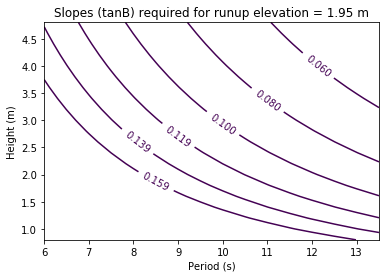

In [4]:
fig, ax = plt.subplots()
for i, slope in enumerate(Srange):
    if(np.max(R2a[i,:,:]))>=target_R2:
        CS=ax.contour(Trange,Hrange,np.squeeze(R2a[i,:,:]),levels=[target_R2,5])
        ax.clabel(CS, fmt='{:.3f}'.format(slope),inline=1, fontsize=10)
        plt.xlabel('Period (s)')
        plt.ylabel('Height (m)')
        plt.title('Slopes (tanB) required for runup elevation = {:.2f} m'.format(target_R2))    
